In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
DATA_ROOT_DIR = '../data/'
DATASET = os.path.join(DATA_ROOT_DIR, "tasks01/train.csv")

In [3]:
np.random.seed(42)

# Analisando a estrutura dos dados

Temos 9 atributos e uma coluna classe, que será o alvo das predições.

In [4]:
dataset = pd.read_csv(DATASET, sep=';')
dataset.head(10)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,class
0,4,2,2,1,2,1,2,1,1,0
1,8,7,8,2,4,2,5,10,1,1
2,3,3,5,2,3,10,7,1,1,1
3,3,3,5,2,3,10,7,1,1,1
4,2,1,1,1,3,1,2,1,1,0
5,1,1,1,1,2,2,1,1,1,0
6,9,10,10,10,10,10,10,10,1,1
7,1,1,1,1,2,1,1,1,1,0
8,8,10,4,4,8,10,8,2,1,1
9,4,1,1,1,2,1,2,1,1,0


O data set em questão não dados ausentes e possui 409 amostras. Todos os valores dos atributos são inteiros de 64 bits.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   att1    409 non-null    int64
 1   att2    409 non-null    int64
 2   att3    409 non-null    int64
 3   att4    409 non-null    int64
 4   att5    409 non-null    int64
 5   att6    409 non-null    int64
 6   att7    409 non-null    int64
 7   att8    409 non-null    int64
 8   att9    409 non-null    int64
 9   class   409 non-null    int64
dtypes: int64(10)
memory usage: 32.1 KB


Quando olhamos para os valores únicos em cada um dos atributos, descobrimos que o atributo 9 não possui nenhuma ocorrência do valor 9.

In [6]:
for col in dataset.columns[:len(dataset.columns)-1]:
    values = dataset[col].unique()
    values.sort()
    print(values)

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8 10]


Como a columa class só tem dois valores únicos, 0 e 1, trata-se de um data set para classificação binária.

In [7]:
dataset['class'].value_counts()

0    255
1    154
Name: class, dtype: int64

In [8]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,class
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,4.528117,3.273839,3.320293,2.960880,3.378973,3.630807,3.515892,2.870416,1.586797,0.376528
std,2.818847,3.057989,3.014280,2.892423,2.309539,3.688632,2.492217,3.024464,1.617285,0.485108
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


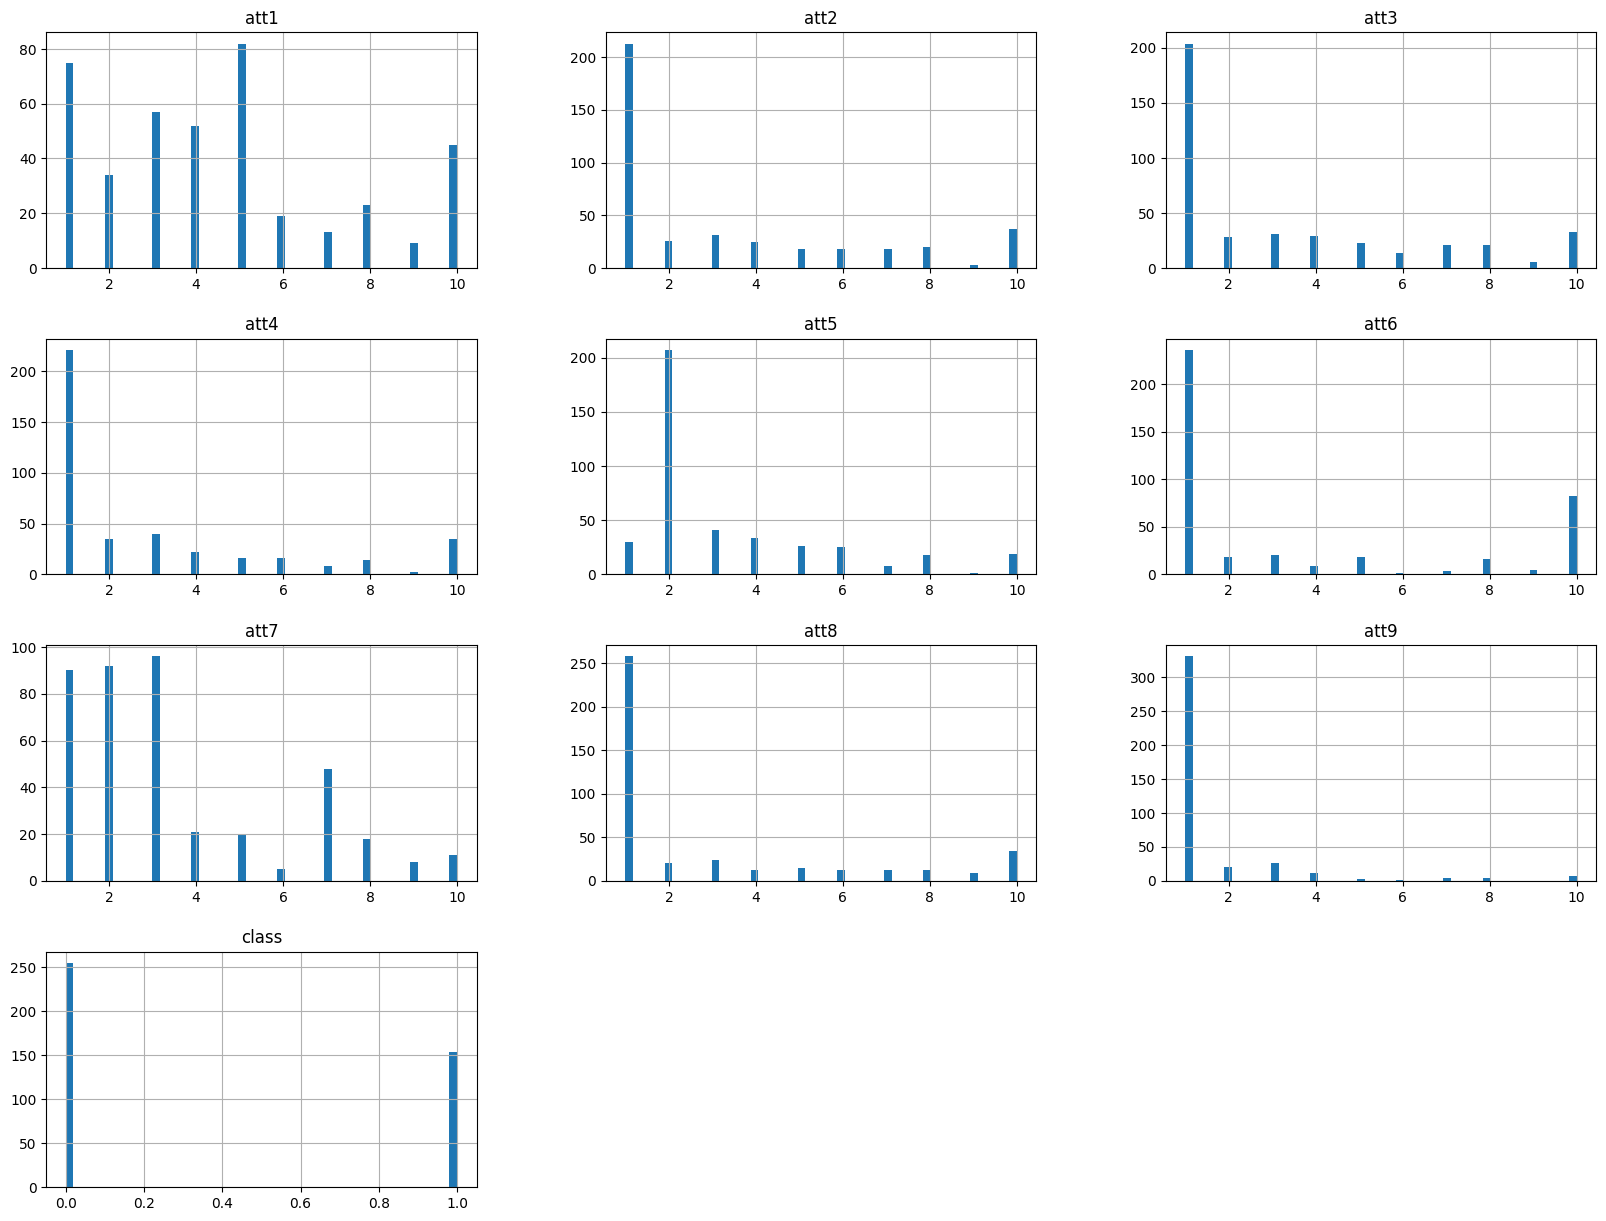

In [9]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot: >

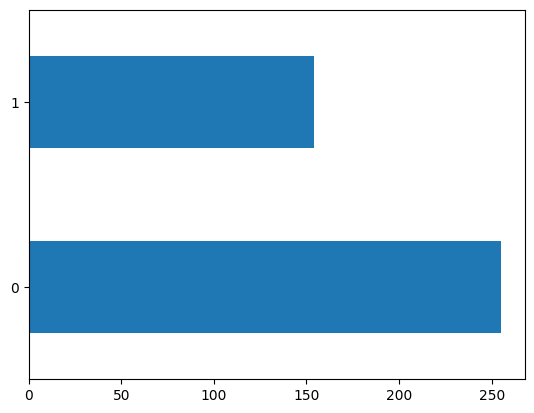

In [10]:
dataset['class'].value_counts().plot.barh()

# Treinamento e Validação

In [11]:
def get_best_model(results):
    max_ = {
        'result': 0,
        'score': 0,
        'estimator': 0,
    }
    for i, result in enumerate(results):
        idx = result['test_f1'].argmax()
        f1 = result['test_f1'].max()
        estimator = result['estimator'][idx]
        if f1 > max_['f1_score']:
            max_['estimator'] = estimator
            max_['result'] = i
            max_['f1_score'] = f1
    return max_

In [12]:
X = dataset.drop('class', axis=1)
y = dataset['class'].copy()

In [13]:
scaler = StandardScaler()
scaler.fit(X, y)
X_scaled = scaler.transform(X)

## Árvore de Decisão

In [14]:
tree = DecisionTreeClassifier()
results = []
for _ in range(30):
    results.append(cross_validate(tree, X_scaled, y, cv=10, scoring=['accuracy', 'f1'], return_estimator=True))

In [15]:
best_tree = get_best_model(results)
best_tree

{'result': 0, 'f1_score': 1.0, 'estimator': DecisionTreeClassifier()}

In [16]:
print('accuracy', np.mean([np.mean(result['test_accuracy']) for result in results]))
print('f1_score', np.mean([np.mean(result['test_f1']) for result in results]))

accuracy 0.9508028455284551
f1_score 0.9321838930631572


## KNN

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
results = []
for _ in range(30):
    results.append(cross_validate(knn, X_scaled, y, cv=10, scoring=['accuracy', 'f1'], return_estimator=True))

In [18]:
best_knn = get_best_model(results)
best_knn

{'result': 0,
 'f1_score': 1.0,
 'estimator': KNeighborsClassifier(n_neighbors=10)}

In [19]:
print('accuracy', np.mean([np.mean(result['test_accuracy']) for result in results]))
print('f1_score', np.mean([np.mean(result['test_f1']) for result in results]))

accuracy 0.9706707317073165
f1_score 0.959860011605006


## Naive Bayes

In [20]:
gnb = GaussianNB()
results = []
for _ in range(30):
    results.append(cross_validate(gnb, X_scaled, y, cv=10, scoring=['accuracy', 'f1'], return_estimator=True))

In [21]:
best_gnb = get_best_model(results)
best_gnb

{'result': 0, 'f1_score': 1.0, 'estimator': GaussianNB()}

In [22]:
print('accuracy', np.mean([np.mean(result['test_accuracy']) for result in results]))
print('f1_score', np.mean([np.mean(result['test_f1']) for result in results]))

accuracy 0.9510975609756093
f1_score 0.9377039745516976
